In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# plot setting
plt.rcParams['font.family']='Arial'

bar_width=0.25
plt.rc('axes', labelsize=11)
plt.rc('xtick', labelsize=8) 
plt.rc('ytick', labelsize=8) 
plt.rc('legend', fontsize=8)
plt.rc('figure', titlesize=10) 
title_size = 18
label_size = 14
point_alpha = 0.8

color_vs = ['#E881A6', '#6EA1D4']
color_year2 = ['#FFBE98', '#FFA74F', '#E881A6', '#60C8B3', '#6EA1D4']
color_year = ['#EFCFBA', '#FFB2A5', '#FA9A85',  '#DE8286', '#F97272']

set_dpi=300

In [78]:
gpd_file_path = '../Data/'
gpd_file_name = 'sig_5179.shp'
loc_file_name = 'result.csv'
car_file_name = 'ASF_Wildboar_Update.csv'

location = pd.read_csv(gpd_file_path + loc_file_name, encoding='cp949', index_col=0)
korea = gpd.read_file(gpd_file_path + gpd_file_name)
car = pd.read_csv(gpd_file_path + car_file_name)

korea = korea.to_crs(epsg=4326)
location_sum = len(location['SIG_CD'].unique())
time_sum = location.query('SIG_CD == 11110').shape[0]

ind = pd.date_range(start = '2019-10-01', end = '2023-05-01', freq = 'D')

저병원성은 병이 풍토병화 된 지역에서만 발견되며 발전해 만성형이 된다. 아직 대한민국에는 보고된 적이 없다. (Ref) 


따라서 제외하고 고병원성, 중병원성을 대상으로 분석할 예정이다.

In [79]:
# Set matrix to save information
car_mat = np.zeros((location_sum, time_sum)) # for carcasses
high_mat = np.zeros((location_sum, time_sum)) # for high carcasses
middle_mat = np.zeros((location_sum, time_sum)) # for middle carcasses
car_day_mat = np.zeros((location_sum, len(ind))) # for carcasses per day each region
high_day_mat = np.zeros((location_sum, len(ind))) # for high carcasses per day each region
middle_day_mat = np.zeros((location_sum, len(ind))) # for middle carcasses per day each region

print(car_mat.shape, high_mat.shape, middle_mat.shape)

(250, 43) (250, 43) (250, 43)


In [80]:
car_day_df = pd.DataFrame(car_day_mat)
car_day_df.index = location['SIG_CD'].unique()
car_day_df.columns = ind
car_day_df

,2019-10-01,2019-10-02,2019-10-03,2019-10-04,2019-10-05,2019-10-06,2019-10-07,2019-10-08,2019-10-09,2019-10-10,...,2023-04-22,2023-04-23,2023-04-24,2023-04-25,2023-04-26,2023-04-27,2023-04-28,2023-04-29,2023-04-30,2023-05-01
11110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
car['확진'] = pd.to_datetime(car['확진'], format='%Y-%m-%d').dt.normalize()

In [6]:
car

,구분,신고(발견),확진,시도,시군구,읍면,리,세부주소,위도,경도,개체구분
0,1,2019-10-02,2019-10-03,경기도,연천군,신서면,도밀리,944,38.264123,127.077756,폐사체
1,2,2019-10-11,2019-10-12,경기도,연천군,왕징면,강서리,986,38.090774,126.938503,수렵개체
2,3,2019-10-11,2019-10-12,강원도,철원군,원남면,진현리,115,38.303126,127.600284,폐사체
3,4,2019-10-12,2019-10-12,강원도,철원군,원남면,진현리,25,38.309478,127.602335,폐사체
4,5,2019-10-12,2019-10-12,강원도,철원군,원남면,진현리,21,38.310692,127.604746,폐사체
...,...,...,...,...,...,...,...,...,...,...,...
3092,3093,NaN,2023-04-30,강원도,삼척시,노곡면,상마읍리,산104,37.2332454,129.166224,NaN
3093,3094,NaN,2023-04-30,강원도,삼척시,마평동,NaN,산185,37.4112628,129.1289781,NaN
3094,3095,NaN,2023-04-30,강원도,삼척시,마평동,NaN,산188-7,37.4092318,129.1322686,NaN
3095,3096,NaN,2023-04-30,강원도,삼척시,마평동,NaN,산188-7,37.4092318,129.1322686,NaN


In [82]:
merged_data = car.merge(location.drop_duplicates(subset='SIG_ENG_NM_x'), left_on='시군구', right_on = 'SIG_ENG_NM_x', how='left')
merged_data['counts'] = 1
merged_col = ['신고(발견)', '확진', '시군구', 'SIG_CD', 'counts']
merged_data = merged_data[merged_col]
merged_sum = merged_data['SIG_CD'].unique()

merged_data = merged_data.set_index('확진', inplace=False)

for i in merged_sum:
    merged = merged_data.query('SIG_CD == @i').groupby('확진')['counts'].sum().resample('D').sum().reindex(ind, fill_value=0)
    car_day_df.loc[i, :] = merged

car_day_df

,2019-10-01,2019-10-02,2019-10-03,2019-10-04,2019-10-05,2019-10-06,2019-10-07,2019-10-08,2019-10-09,2019-10-10,...,2023-04-22,2023-04-23,2023-04-24,2023-04-25,2023-04-26,2023-04-27,2023-04-28,2023-04-29,2023-04-30,2023-05-01
11110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Set function to estimate infected
## h : high carcasses ratio (고병원성 감염률), 1-h : middle carcasses ratio (중병원성 감염률)
def esimate_hm(h, noise, counts, **kwargs):
    # 0 <= h <= 1
    h=0.5
    high_cont = 4 # 평균 잠복기 (고병원성 감염 -> 사망)
    middle_cont = 16 # 평균 잠복기 (중병원성 감염 -> 사망)

    noises = np.abs(np.random.normal(0, noise, len(counts))) # Observation error
    counts = counts + noises

    high_I = counts * high_cont * h
    middle_I = counts * middle_cont * (1-h)

    high_I = high_I
    middle_I = middle_I
    carcasses = counts

    return(high_I, middle_I)

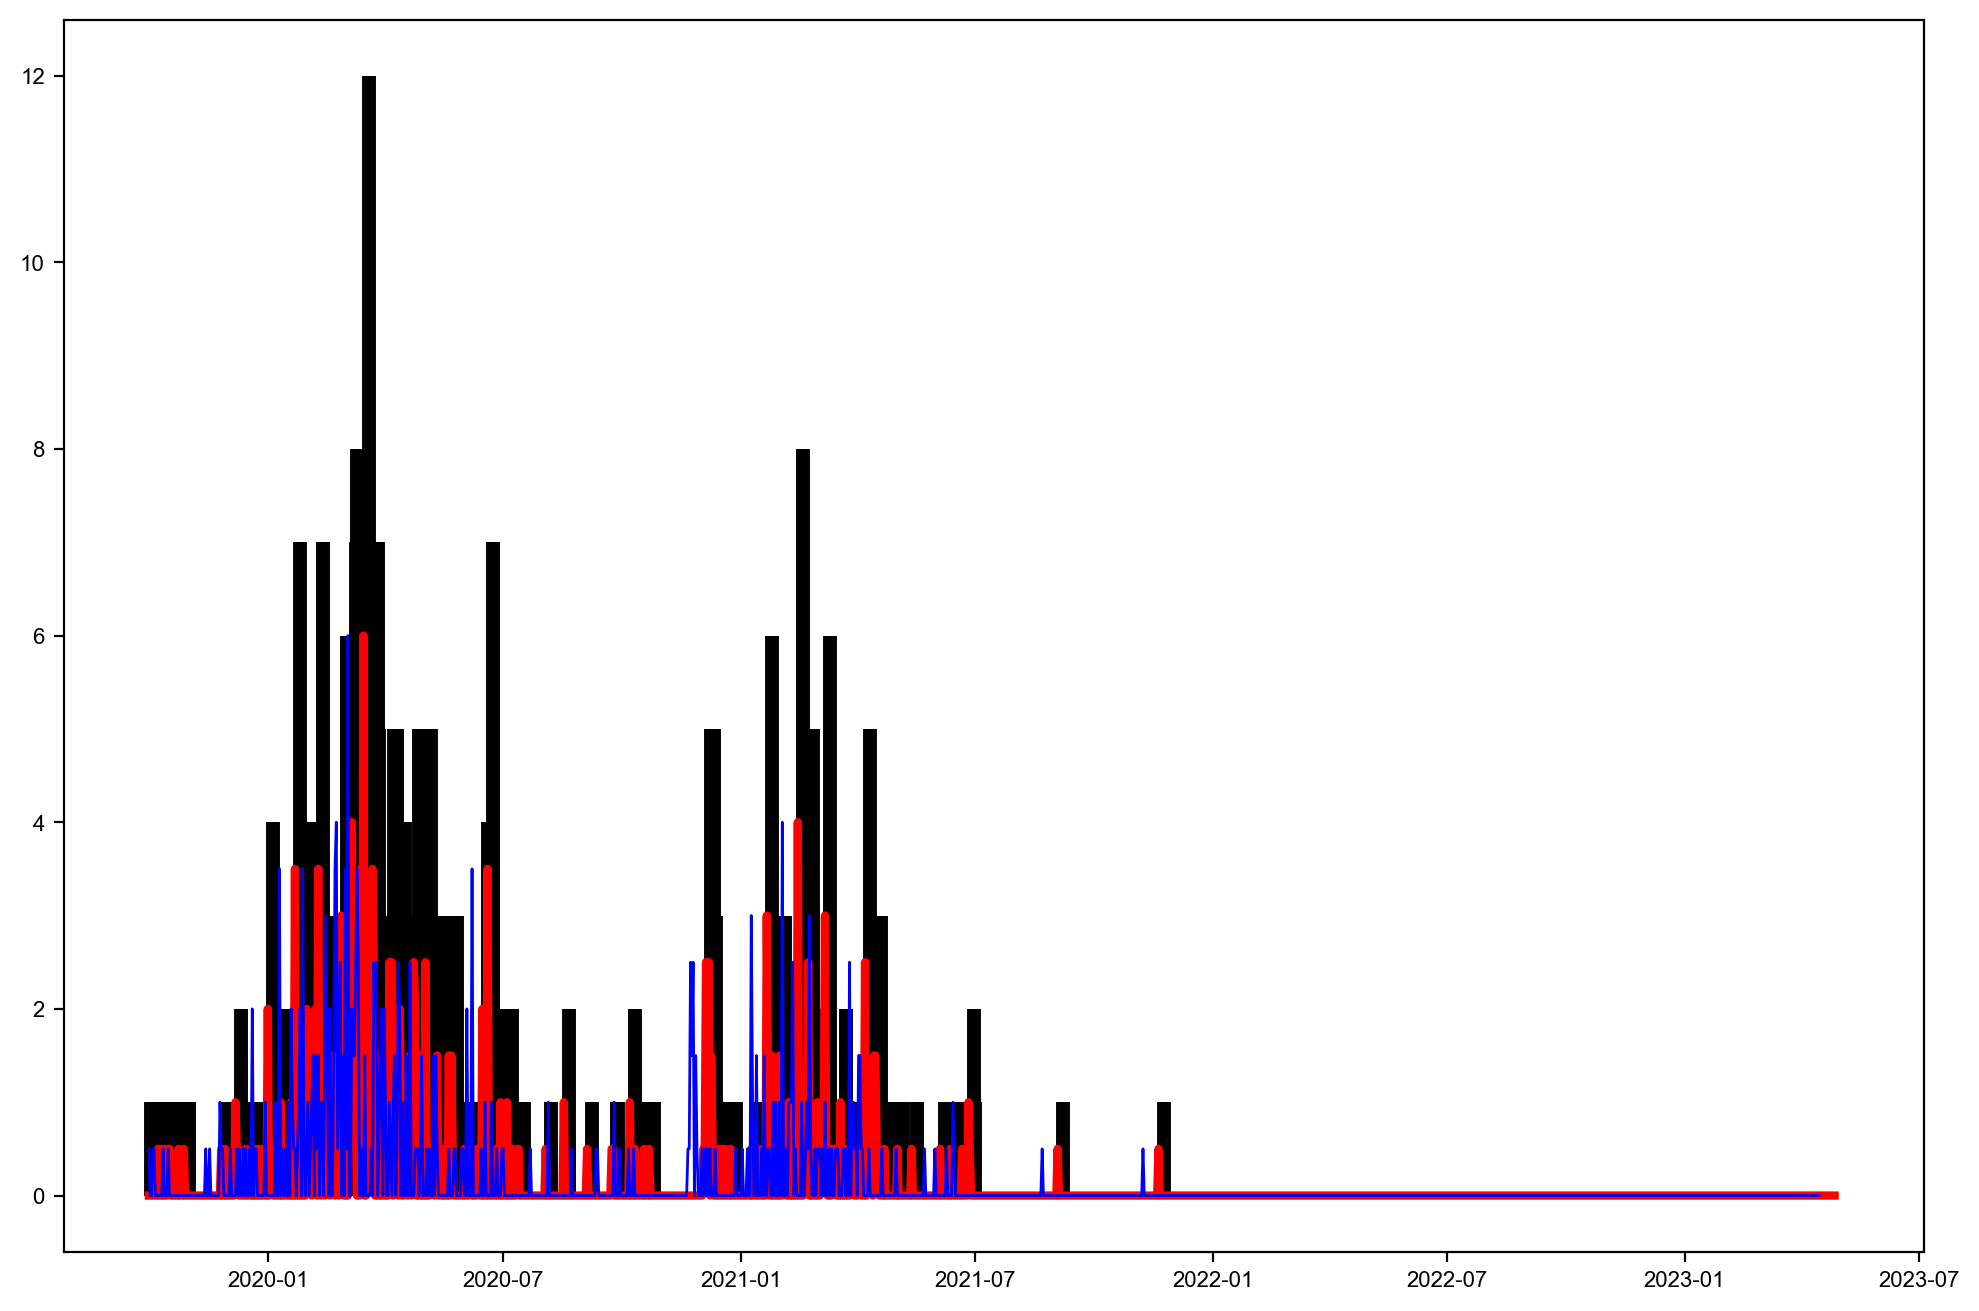

In [117]:
car_day_df_T = car_day_df.T
h = 0.5 # ratio
high_period = 4
middle_period = 16

result = car_day_df_T.loc[:,41800]
result_high = result * h
result_middle = result * h 

fig, ax = plt.subplots(figsize = (12, 8), dpi = 200)
ax.vlines(x=result.index, ymin=0, ymax=result.values, label='Carcasses', linewidth = 5, color = 'black')
ax.plot(result.index, result_high.shift(-high_period), label='High', color = 'red', linewidth = 3)
ax.plot(result.index, result_middle.shift(-middle_period), label='Middle', color = 'blue', linewidth = 1)

plt.show()

In [88]:
(car_day_df_T == np.Inf).sum().sum()

0

In [85]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
# 고병원성은 4일, 중병원성은 16일 동안 유지되고 사망한다고 가정
result_high_cumsum = result_high.copy()

for i in range(len(result_high_cumsum)-high_period):
    if result_high[i] > 0:
        result_high_cumsum[(i+1):(i+high_period)] = result_high_cumsum[(i+1):(i+high_period)] + result_high[i]
    else:
        pass

result_middle_cumsum = result_middle.copy()

for i in range(len(result_middle_cumsum)-middle_period):
    if result_middle[i] > 0:
        result_middle_cumsum[(i+1):(i+middle_period)] = result_middle_cumsum[(i+1):(i+middle_period)] + result_middle[i]
    else:
        pass

In [120]:
lose_infection_period = 20

high_cumsum_mat = car_day_df_T * 0.5
middle_cumsum_mat = car_day_df_T * 0.5
high_cumsum_mat = high_cumsum_mat.shift(-high_period).fillna(0)
middle_cumsum_mat = middle_cumsum_mat.shift(-middle_period).fillna(0)
car_cumsum_mat = car_day_df_T * 1


for region in car_day_df_T.columns:
    dat = car_day_df_T.loc[:,region]
    for time in range(len(dat)-high_period):
        if dat[time] > 0:
            high_cumsum_mat.loc[:,region][(time+1):(time+high_period)] = high_cumsum_mat.loc[:,region][(time+1):(time+high_period)] + dat[time]
        else:
            pass

for region in car_day_df_T.columns:
    dat = car_day_df_T.loc[:,region]
    for time in range(len(dat)-middle_period):
        if dat[time] > 0:
            middle_cumsum_mat.loc[:,region][(time+1):(time+middle_period)] = middle_cumsum_mat.loc[:,region][(time+1):(time+middle_period)] + dat[time]
        else:
            pass
  
# 폐사체가 발견이 되었다는 건 수거했음을 의미      
# for region in car_day_df.T.columns:
#     dat = car_day_df_T.loc[:,region]
#     for time in range(len(dat)-lose_infection_period):
#         if dat[time] > 0:
#             car_cumsum_mat.loc[:,region][(time+1):(time+lose_infection_period)] = car_cumsum_mat.loc[:,region][(time+1):(time+lose_infection_period)] + dat[time]
#         else:
#             pass

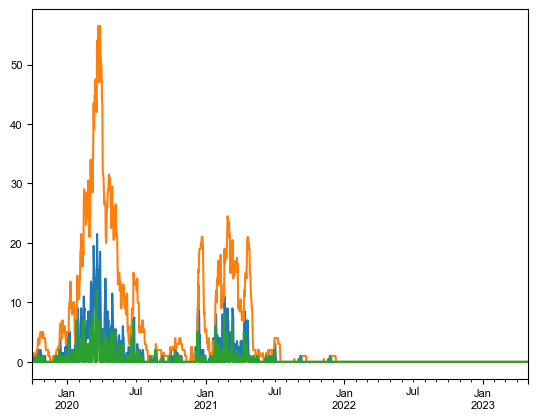

In [121]:
high_cumsum_mat.loc[:,41800].plot()
middle_cumsum_mat.loc[:,41800].plot()
car_cumsum_mat.loc[:,41800].plot()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8), dpi = 200)
ax.plot(high_mat.index, high_mat.sum(axis=1), label='High', color = 'red', linewidth = 3)
ax.plot(middle_mat.index, middle_mat.sum(axis=1), label='Middle', color = 'blue', linewidth = 1)
ax.plot(car_day_df_T.resample('M').sum().index, car_day_df_T.resample('M').sum().sum(axis=1), label='Carcasses', color = 'black', linewidth = 5)
plt.tight_layout()
plt.show()

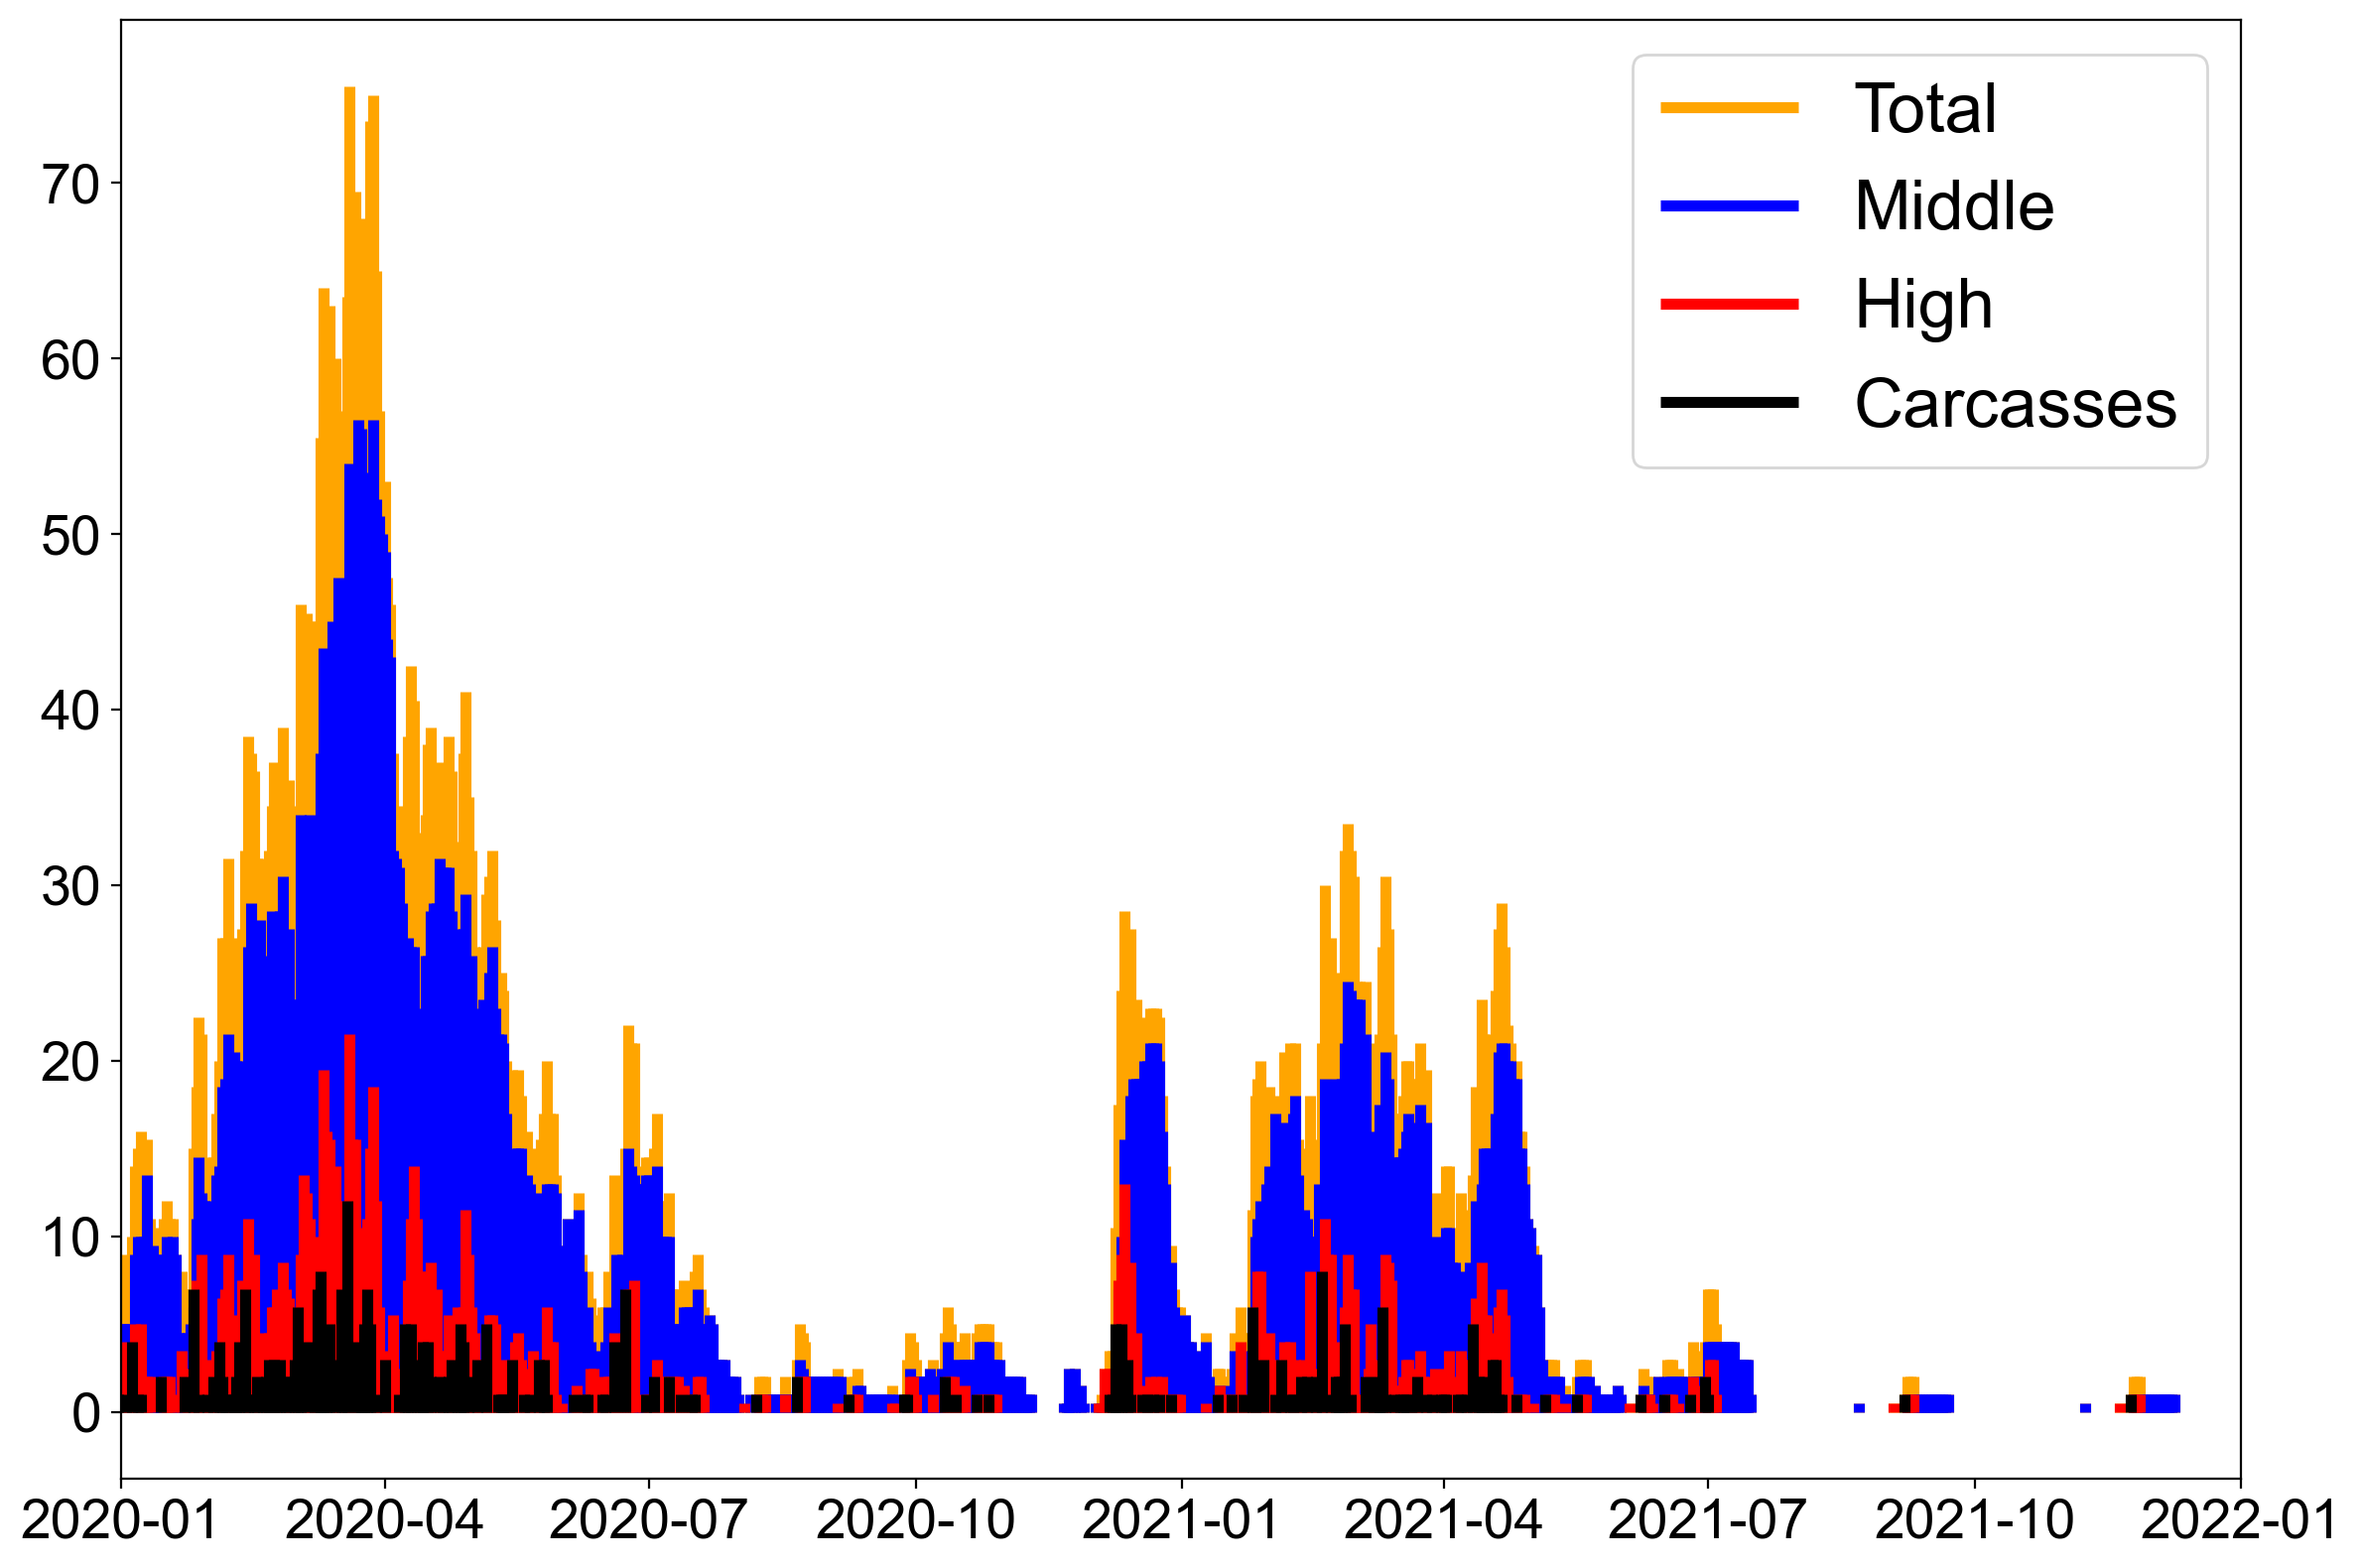

In [148]:
fig, ax = plt.subplots(figsize = (12, 8), dpi = 200)
ax.vlines(x=high_cumsum_mat.index, ymin=0, ymax=high_cumsum_mat.loc[:, 41800]+middle_cumsum_mat.loc[:, 41800]+car_cumsum_mat.loc[:, 41800]
          , label='Total', linewidth = 4, color = 'orange', alpha = 1)
ax.vlines(x=middle_cumsum_mat.index, ymin=0, ymax=middle_cumsum_mat.loc[:, 41800], label='Middle', linewidth = 4, color = 'blue', alpha = 1)
ax.vlines(x=high_cumsum_mat.index, ymin=0, ymax=high_cumsum_mat.loc[:, 41800], label='High', linewidth = 4, color = 'red', alpha = 1)
ax.vlines(x=car_cumsum_mat.index, ymin=0, ymax=car_cumsum_mat.loc[:, 41800], label='Carcasses', linewidth = 4, color = 'black', alpha = 1)
ax.set_xlim([pd.Timestamp('2020-01-01'), pd.Timestamp('2022-01-01')])
ax.legend(loc = 'upper right', fontsize = 25)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.tight_layout()
plt.show()

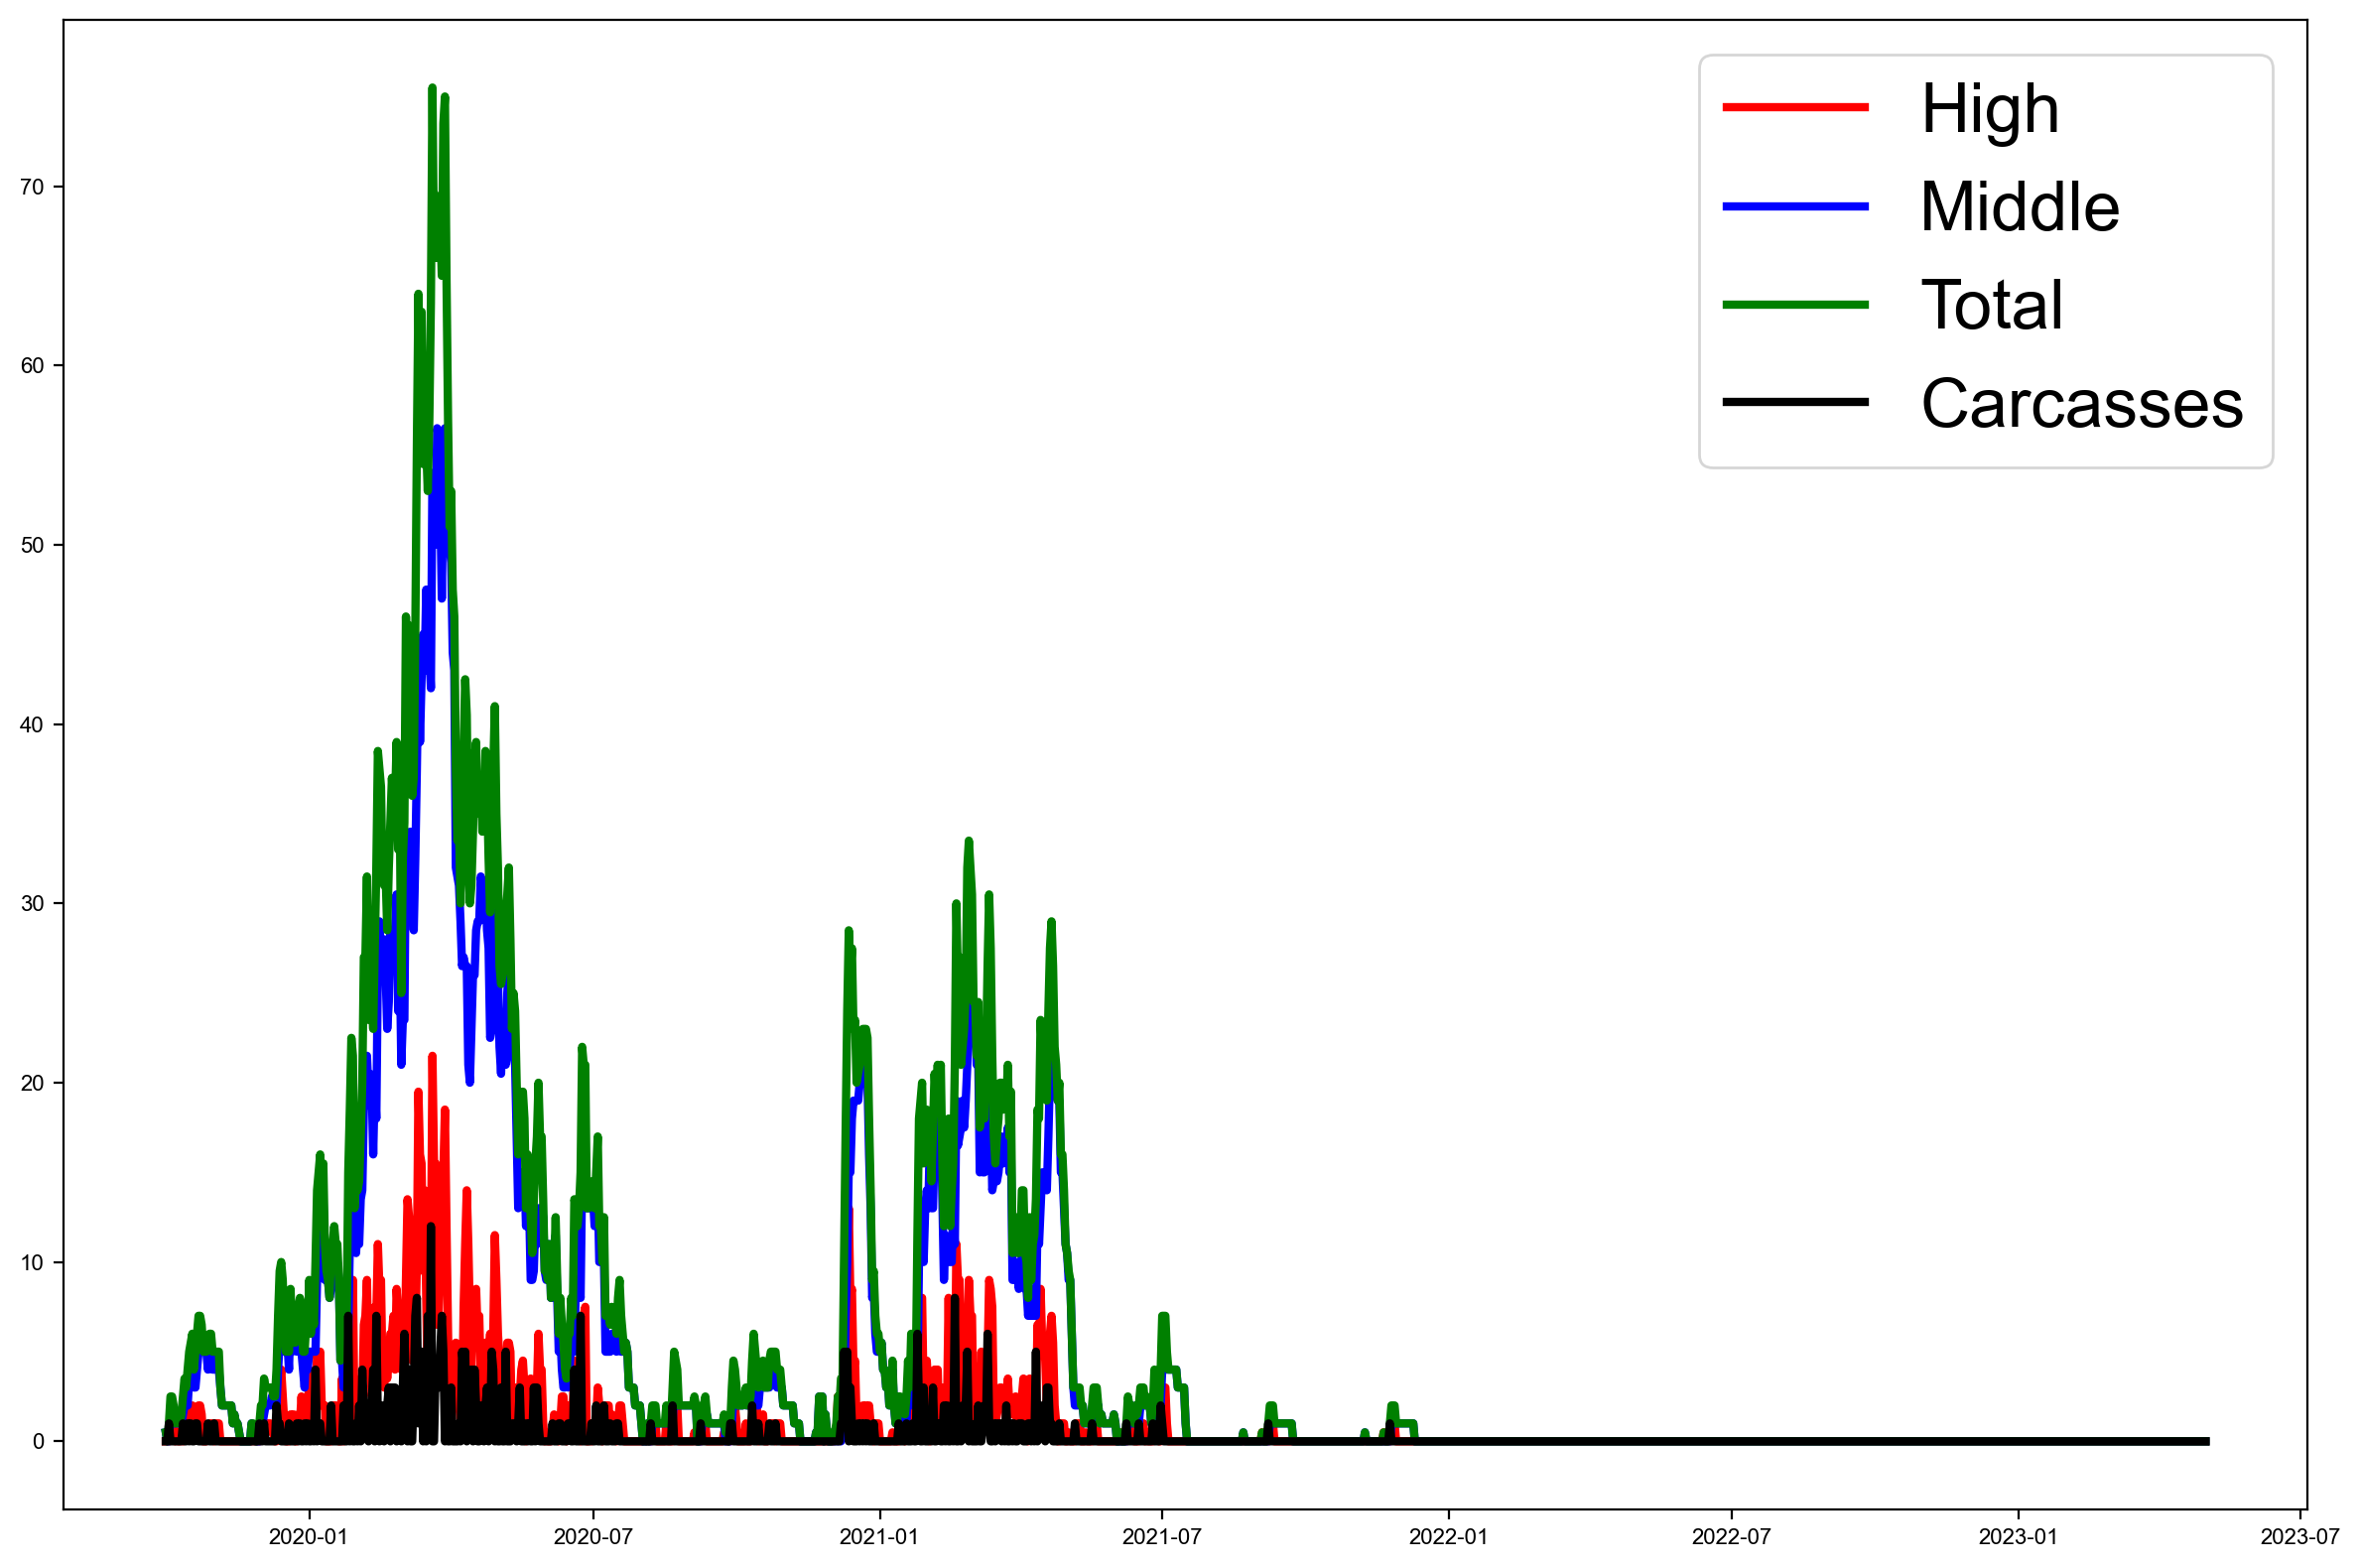

In [131]:
fig, ax = plt.subplots(figsize = (12, 8), dpi = 200)
ax.plot(high_cumsum_mat.loc[:, 41800].index, high_cumsum_mat.loc[:, 41800], label='High', color = 'red', linewidth = 3)
ax.plot(middle_cumsum_mat.loc[:, 41800].index, middle_cumsum_mat.loc[:, 41800], label='Middle', color = 'blue', linewidth = 3)
ax.plot(car_cumsum_mat.loc[:, 41800].index, car_cumsum_mat.loc[:, 41800] + high_cumsum_mat.loc[:, 41800] + middle_cumsum_mat.loc[:, 41800], label='Total', color = 'green', linewidth = 3)
ax.plot(car_cumsum_mat.loc[:, 41800].index, car_cumsum_mat.loc[:, 41800], label='Carcasses', color = 'black', linewidth = 3)
plt.legend( loc='upper right', fontsize = 25)
plt.tight_layout()
plt.show()